## Climate X Technical Interview
### Author: Nicolás Santos


___

## Task I

#### How would I approach the problem?

The problem involves reverse geocoding, there are libraries in R and Python for this kind of tasks. Some might require API keys to perform bulk processing of the coordinates. Geopy in Python is a good example of a package that offers dozens of possible geocoders.

Naturally, misclassifications occur in this kind of processes so an important portion of time must be allocated to validation.

Examples:

In [3]:
from geopy.geocoders import Nominatim

geo = Nominatim(user_agent="GetLoc")

location = geo.reverse("59.31643, 18.05980")

print(location.address)

Maria Gamla Skola, Wollmar Yxkullsgatan, Zinkensdamm, Södermalm, Södermalms stadsdelsområde, Stockholms kommun, Stockholms län, 118 53, Sverige


In [13]:
from geopy.geocoders import GoogleV3 

point = '59.31643, 18.05980'
geo = GoogleV3(api_key="")
address = geo.reverse(point)


#### Explain data required, cleaning, algorithms and techniques you'd try

It is a simple process that initially only requires a set of coordinates. Ideally we would like to have a data frame with three inputs:

    - Building ID: identifier of the building.
    - Latitude: Y coordinate of the centroid of the building.
    - Longitude: X coordinate of the centroid of the building.
    
For the cleaning process it is instrumental to first check that ALL coordinates are in the same coordinate system. If not, a reprojection of the centroids must be done before starting this process.

Once the coordinates are compatible, we can proceed with some additional cleaning. Given that we now the countries we are working with, a good idea to flag observations in the data is comparing the coordinates with the valid extents of the countries. This means checking that the coordinates for each observation fall in a valid *bounding box* of a country’s territory. This can be done with simple logical operations.

#### How would I validate?

Depending on the resource restrictions I would try two approaches:

-	No restrictions

Validate across different available geocoding services.

-	On a budget

I would study the neighboring buildings to try to complete an observations data. Naturally, this process can be automated using geopandas.

Take the following example in Dublin: we have the coordinates of Art Flamingo and a partial address with information missing for the street name. However, we know Art Flamingo’s neighbors, Kings Stationary and BSkewers BBQ Shop, are both on Bolton St. With this information we can complete Art Flamingo’s address. A similar process can be done for missing numbers instead of street names. An important note for this approach is that for corner buildings deducing the street names or numbers would be trickier, however it is still possible. Take The Kings Inn for example, a corner building in 42 Bolton St. If we only knew the number we could deduce that it is actually on Bolton St. and not on Henrietta St. because one of its neighbours is number 37 and the other 1. Being 37 closer to 42 the Kings Inn address must be on Bolton St. All of the previous statements can be programmed.


Another alternative for filling missing street names is through a spatial join if the line geometries of the street nertworks with their corresponding atributes are available. 

After this process we can validate by geocoding the resulting addresses, if the process was successful, we should expect to get roughly the same coordinates after geocoding the newly completed addresses and comparing them with the original coordinates.

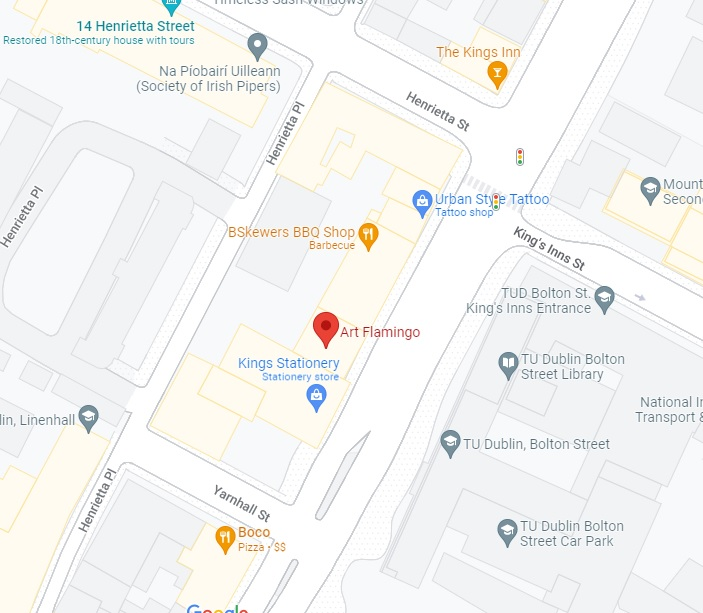

## Task II

### Determine age and/or what walls are made of for all western european buildings

Building materials and building age are highly correlated, my approach to solve this problem would involve first finding out the materials of the building.  

To do so we need to define a finite set of categories for classifying building walls (for example: brick, wood, concrete block, asphalt, etc.). With these categories we can build a multiclass classification machine learning algorithm. According to the literature, artificial neural networks show promising results in predicting building materials and age ([Example 1](https://www.researchgate.net/publication/341321930_Estimating_building_age_from_Google_street_view_images_using_deep_learning), [Example 2](https://www.intechopen.com/chapters/75628)). Using Tensorflow and Keras in python we can work with state of the art Convolutional Neural Networks (CNNs) for image recognition.

To work  with CNNs we need images of the buildings as inputs for the model. Previous studies have worked with Google Street View Image API to procure the images of buildings at exact locations.

